In [8]:
import pandas as pd
import boto3
from io import BytesIO
import gzip
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

AWS_REGION = 'us-east-1'
ROW_LIMIT = 10000

s3 = boto3.client('s3')

In [135]:
bucket = "sura-text-mining-poc"
key = "raw/complaints/complaints.csv"

obj = s3.get_object(Bucket=bucket, Key=key)
obj = BytesIO(obj['Body'].read())

complaints_df = pd.read_csv(obj)

# Exploratory analysis

In [191]:
#filtro de columnas para nuevo dataframe
complaints_tickets_df =  complaints_df[['City','State','Status','Ticket #']]
ticket_grouped_df = complaints_tickets_df.groupby(['City','State','Status'], as_index=False)

ticket_grouped_df = ticket_grouped_df.count()
ticket_grouped_df.head(5)

,City,State,Status,Ticket #
0,Abingdon,Maryland,Closed,1
1,Acworth,Georgia,Closed,2
2,Acworth,Georgia,Open,1
3,Acworth,Georgia,Pending,1
4,Acworth,Georgia,Solved,2


# Results

## Top 5 city Open ticket

In [189]:
ticket_open_df = ticket_grouped_df["Status"]=='Open'
ticket_open_df = ticket_grouped_df[ticket_open_df]
ticket_open_df = ticket_open_df.sort_values(by=['Ticket #'],ascending=False)
ticket_open_df.head()

,City,State,Status,Ticket #
45,Atlanta,Georgia,Open,12
632,Knoxville,Tennessee,Open,11
558,Houston,Texas,Open,9
851,Nashville,Tennessee,Open,5
127,Boca Raton,Florida,Open,5


## Top 5 city Close ticket

In [187]:
ticket_open_df = ticket_grouped_df["Status"]=='Closed'
ticket_open_df = ticket_grouped_df[ticket_open_df]
ticket_open_df = ticket_open_df.sort_values(by=['Ticket #'],ascending=False)
ticket_open_df.head()

,City,State,Status,Ticket #
230,Chicago,Illinois,Closed,17
588,Jacksonville,Florida,Closed,13
44,Atlanta,Georgia,Closed,13
966,Philadelphia,Pennsylvania,Closed,10
1103,San Jose,California,Closed,9


### Ranking de ciudades

In [110]:
def generate_report(df, idx):
    grouped = df[idx].groupby(['City','State','Status'], as_index=False)
    return grouped["Ticket #"]

In [128]:
result_open = generate_report(df, df['Status']=='Open').count()
result_open = result_open.sort_values(by=['Ticket #'], ascending=False)

In [134]:

#result_open.to_json(orient='records', lines=True)

,City,State,Status,Ticket #
10,Atlanta,Georgia,Open,12
124,Knoxville,Tennessee,Open,11
106,Houston,Texas,Open,9
167,Nashville,Tennessee,Open,5
28,Boca Raton,Florida,Open,5


In [ ]:
generate_report(df, df['Status']=='Solved').head(10)

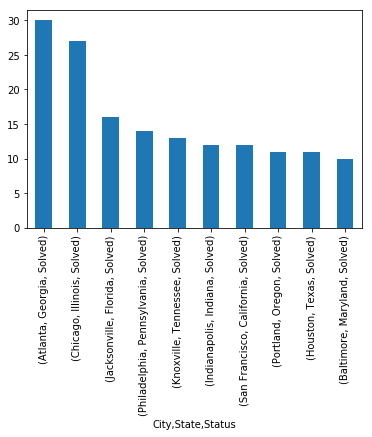

In [7]:
generate_report(df, df['Status']=='Solved').head(10).plot(kind="bar")

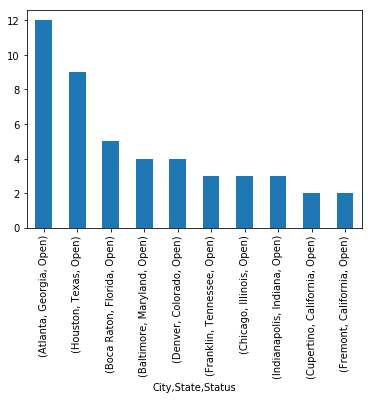

In [77]:
result_open.head(10).plot(kind="bar")